# Lab 6

# TASK 1(B)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


# loading the dataset
data = pd.read_csv("student_data.csv")

In [2]:
data.shape

(100, 3)

In [3]:
data.head()

,Hours_Studied,Review_Session,Results
0,3.745401,0,0
1,9.507143,1,1
2,7.319939,0,1
3,5.986585,0,1
4,1.560186,1,1


In [4]:
data.tail()

,Hours_Studied,Review_Session,Results
95,4.937956,1,1
96,5.227328,1,1
97,4.275410,0,1
98,0.254191,0,0
99,1.078914,1,0


In [5]:
data.describe()

,Hours_Studied,Review_Session,Results
count,100.000000,100.000000,100.000000
mean,4.701807,0.490000,0.680000
std,2.974894,0.502418,0.468826
min,0.055221,0.000000,0.000000
25%,1.932008,0.000000,0.000000
50%,4.641425,0.000000,1.000000
75%,7.302031,1.000000,1.000000
max,9.868869,1.000000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Hours_Studied   100 non-null    float64
 1   Review_Session  100 non-null    int64  
 2   Results         100 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 2.5 KB


# 1 Visualization of Data

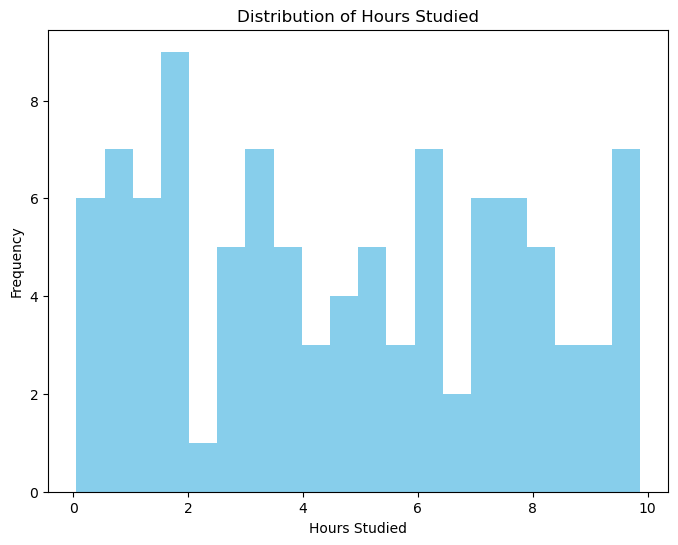

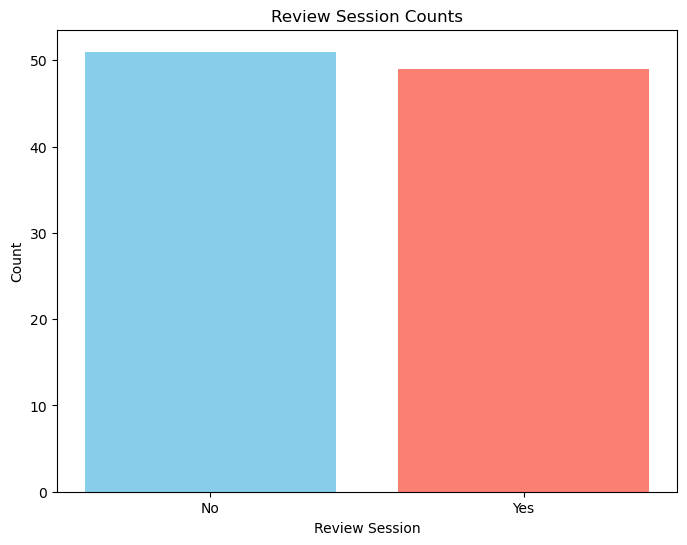

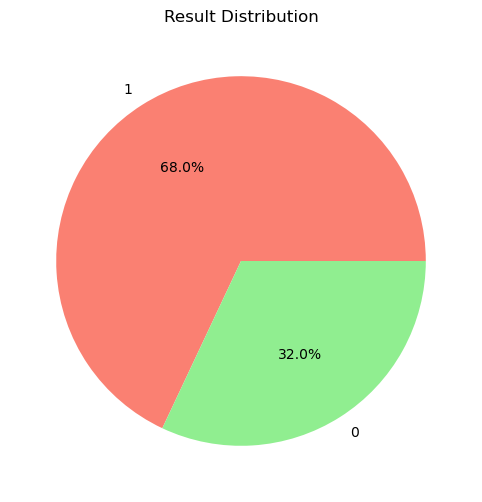

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("student_data.csv")

# Visualization 1: Histogram of Hours Studied
plt.figure(figsize=(8, 6))
plt.hist(data['Hours_Studied'], bins=20, color='skyblue')
plt.title('Distribution of Hours Studied')
plt.xlabel('Hours Studied')
plt.ylabel('Frequency')
plt.show()

# Visualization 2: Bar chart for Review Session
plt.figure(figsize=(8, 6))
review_counts = data['Review_Session'].value_counts()
plt.bar(review_counts.index, review_counts.values, color=['skyblue', 'salmon'])
plt.title('Review Session Counts')
plt.xlabel('Review Session')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

# Visualization 3: Pie chart for Results
plt.figure(figsize=(8, 6))
result_counts = data['Results'].value_counts()
plt.pie(result_counts, labels=result_counts.index, autopct='%1.1f%%', colors=['salmon', 'lightgreen'])
plt.title('Result Distribution')
plt.show()


# 2. Logistic Regression

In [8]:
# Define the features and target
X = data[['Hours_Studied', 'Review_Session']]
y = data['Results']

# Fit a logistic regression model
model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

In [9]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv("student_data.csv")

# Split the data into features (X) and target variable (y)
X = data[['Hours_Studied', 'Review_Session']]
y = data['Results']

# Standardize the features (optional but can be beneficial for some models)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Evaluate the model on the test set
accuracy = logistic_model.score(X_test, y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 85.00%


C:\Users\jaswa\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\jaswa\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


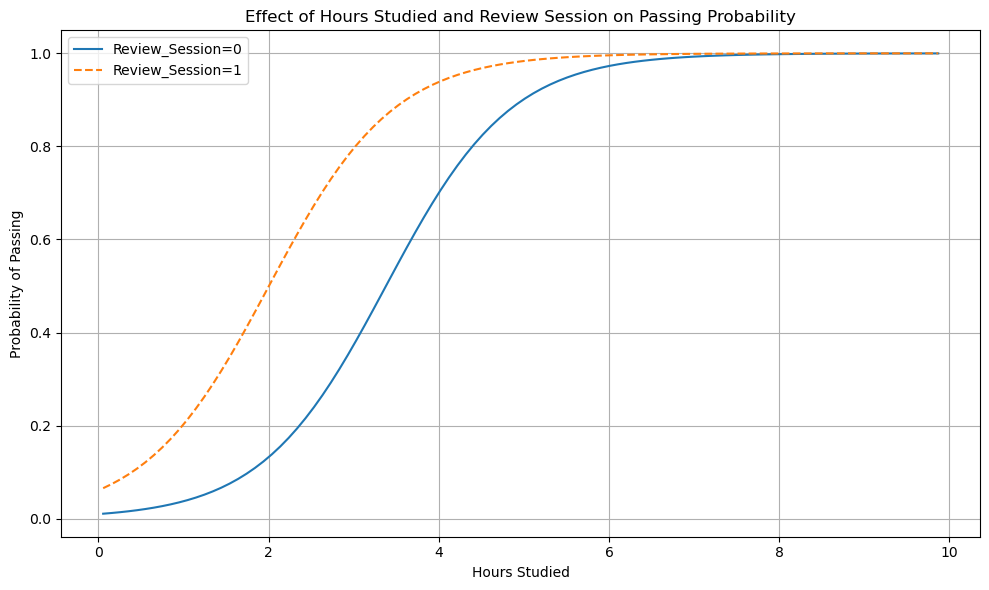

In [10]:
# Create a range of hours studied values for prediction
hours_studied_range = np.linspace(data['Hours_Studied'].min(), data['Hours_Studied'].max(), 100)

# Predict probabilities for each value in the range with both Review_Session values
# Assuming 'Review_Session' values of 0 and 1
probabilities = model.predict_proba(np.column_stack((hours_studied_range, np.zeros(100))))
probabilities_1 = model.predict_proba(np.column_stack((hours_studied_range, np.ones(100))))

# Extract probability values for each class
probability_0 = probabilities[:, 1]  # Probability of passing when Review_Session=0
probability_1 = probabilities_1[:, 1]  # Probability of passing when Review_Session=1

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(hours_studied_range, probability_0, label='Review_Session=0')
plt.plot(hours_studied_range, probability_1, label='Review_Session=1', linestyle='--')
plt.xlabel('Hours Studied')
plt.ylabel('Probability of Passing')
plt.title('Effect of Hours Studied and Review Session on Passing Probability')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Model Coefficents

Coefficients: [[1.57480245 1.294014  ]]
Intercept: [-5.09707683]
Accuracy: 0.8666666666666667
AUC: 0.94


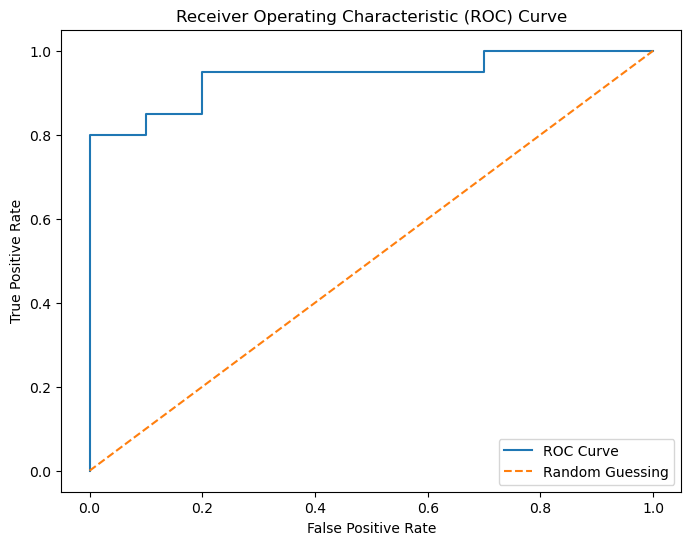

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Load the data
data_path = "C:/Users/jaswa/OneDrive/Desktop/733/Data set lab 6/student_data.csv"
data = pd.read_csv(data_path)

# Define features (X) and target variable (y)
X = data[['Hours_Studied', 'Review_Session']]
y = data['Results']

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the logistic regression model
log_reg_model = LogisticRegression()

# Fit the model
log_reg_model.fit(X_train, y_train)

# Get model coefficients
coefficients = log_reg_model.coef_
intercept = log_reg_model.intercept_

print(f'Coefficients: {coefficients}')
print(f'Intercept: {intercept}')

# Predict on the test set
y_pred = log_reg_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, log_reg_model.predict_proba(X_test)[:, 1])

print(f'Accuracy: {accuracy}')
print(f'AUC: {roc_auc}')

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, log_reg_model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


# TASK 2 

# 1. Linear Kernel

In [12]:
# from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
data = pd.read_csv("student_data.csv")

# Split the data into features (X) and target variable (y)
X = data[['Hours_Studied', 'Review_Session']]
y = data['Results']

# Standardize the features (optional but can be beneficial for some models)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the SVM model with linear kernel
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Generate classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)


Accuracy: 90.00%
Classification Report:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         6
           1       1.00      0.86      0.92        14

    accuracy                           0.90        20
   macro avg       0.88      0.93      0.89        20
weighted avg       0.93      0.90      0.90        20



## 2. RBF Kernel

In [13]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Assuming X_train, X_test, y_train, y_test are your actual data
# Replace these with your actual data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Initialize an SVM classifier with an RBF kernel
svm_model = SVC(kernel='rbf')

#Define a hyperparameter grid
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1]}

#Set up Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy', verbose=2)

#Fit the grid search on the training data
grid_search.fit(X_train, y_train)

#Extract the best values of 'gamma' and 'C' from the grid search results
best_gamma = grid_search.best_params_['gamma']
best_C = grid_search.best_params_['C']

#Initialize a new SVM classifier with the best hyperparameters
best_svm_model = SVC(kernel='rbf', gamma=best_gamma, C=best_C)

#Fit the SVM with the best hyperparameters on the training data
best_svm_model.fit(X_train, y_train)

#Make predictions on the test data and calculate accuracy
y_pred = best_svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

#Print the results
print(f'RBF Kernel SVM accuracy: {accuracy}')
print(f'Best gamma: {best_gamma}')
print(f'Best C: {best_C}')


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0